## Outlier Analysis with Single Sample

In [1]:
import seaborn as sns
diamonds =sns.load_dataset('diamonds')
df = diamonds.copy()
df = df.select_dtypes(include = ['float64', 'int64'])
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_table = df['table'].copy()

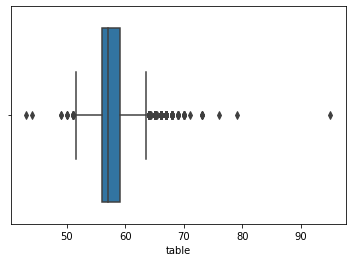

In [3]:
sns.boxplot(df_table);

In [4]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1
below_limit = Q1 - (1.5+IQR)
above_limit = Q3 + (1.5 + IQR)
print('below limit : ',below_limit)
print('above limit : ',above_limit)

below limit :  51.5
above limit :  63.5


In [5]:
(df_table < (below_limit)) | (df_table > (above_limit))

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [6]:
outlier_tf = df_table < (below_limit)
outlier_tf[0:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: table, dtype: bool

In [7]:
df_table[outlier_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [8]:
df_table[outlier_tf].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

## Solving Outlier Value Problem

In [9]:
import pandas as pd
import numpy as np

In [10]:
# deleting outliers

In [11]:
df_table = df_table.values.reshape(-1,1)

In [12]:
clean_df_table = df_table[~((df_table < (below_limit)) | (df_table > (above_limit))).any(axis = 1)]

In [13]:
clean_df_table.shape

(53335, 1)

In [14]:
# filling with means

In [15]:
df_table = df['table'].copy()

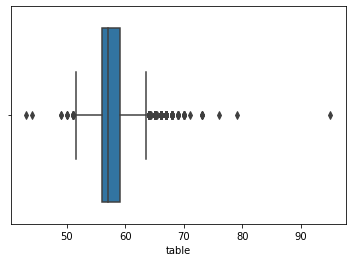

In [16]:
sns.boxplot(df_table);

In [17]:
df_table[outlier_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [18]:
df_table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [19]:
outlier_tf = (df_table < (below_limit)) | (df_table > (above_limit))

In [20]:
df_table[outlier_tf] = df_table.mean()

In [21]:
df_table[outlier_tf]

2        57.457184
91       57.457184
145      57.457184
219      57.457184
227      57.457184
           ...    
53695    57.457184
53697    57.457184
53756    57.457184
53757    57.457184
53785    57.457184
Name: table, Length: 605, dtype: float64

In [22]:
df_table.describe()

count    53940.000000
mean        57.374344
std          2.062702
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

## Filling Outliers with Suppression Method

In [23]:
df_table = df['table'].copy()
outlier_tf = df_table < (below_limit)

In [24]:
df_table[outlier_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [25]:
below_limit

51.5

In [26]:
df_table[outlier_tf] = below_limit

In [27]:
df_table[outlier_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

In [28]:
outlier_tf = df_table < (above_limit)

In [29]:
df_table[outlier_tf]

0        55.0
1        61.0
3        58.0
4        58.0
5        57.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53350, dtype: float64

In [30]:
above_limit

63.5

In [31]:
df_table[outlier_tf] = above_limit
df_table[outlier_tf]

0        63.5
1        63.5
3        63.5
4        63.5
5        63.5
         ... 
53935    63.5
53936    63.5
53937    63.5
53938    63.5
53939    63.5
Name: table, Length: 53350, dtype: float64

In [32]:
df_table.mean()

63.51917686318131

## Multivariate Outlier Observe Analysis

### Local Outlier Factor

In [33]:
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [34]:
np.random.seed(42)
X_inliers = np.random.normal(70,3, (100,2))
X_inliers = np.r_[X_inliers + 10, X_inliers - 10]
print(X_inliers.shape)
print(X_inliers[:3,:2])

(200, 2)
[[81.49014246 79.5852071 ]
 [81.94306561 84.56908957]
 [79.29753988 79.29758913]]


In [35]:
X_outliers = np.random.uniform(low=15, high=130, size=(20,2))
X_outliers

array([[115.89790327, 100.18839104],
       [ 95.15681021,  95.78566966],
       [ 56.34148239,  48.76306209],
       [108.07653288, 108.16304039],
       [114.71331664, 120.02266354],
       [ 73.80437587,  72.67437389],
       [106.80394558,  89.74585204],
       [ 95.72619088, 106.51615699],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 68.54377209,  77.40413299],
       [ 47.95224399,  82.94582497],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263],
       [ 77.17303899,  88.30443867]])

In [36]:
X = np.r_[X_inliers, X_outliers]
X[0:3,:]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

In [37]:
LOF =  LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [38]:
LOF.fit_predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [39]:
X_score = LOF.negative_outlier_factor_

In [40]:
X_score[0:3]

array([-0.99920793, -1.14732911, -0.97212675])

In [41]:
X_score.mean()

-1.6850227435158005

In [42]:
X_score.std()

2.140119050235338

In [43]:
np.sort(X_score)[0:10]

array([-15.3785652 , -11.57669644, -10.75276599, -10.24101046,
       -10.07364152,  -9.64406264,  -9.34229978,  -9.26256027,
        -9.06812573,  -8.51275904])

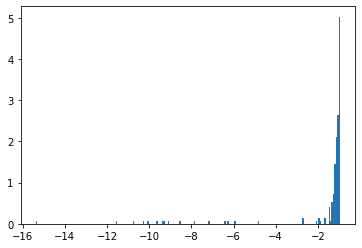

In [44]:
plt.hist(X_score, bins='auto', density = True);

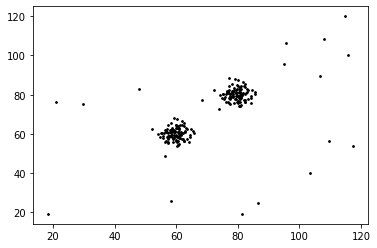

In [45]:
plt.scatter(X[:,0], X[:,1], color='k', s = 3, label='Observation Units');

In [46]:
radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())

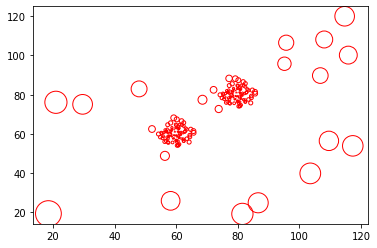

In [47]:
plt.scatter(X[:,0], X[:,1], s = 666 * radius, edgecolors='r',
            facecolors='none', label = 'LOF Scores');

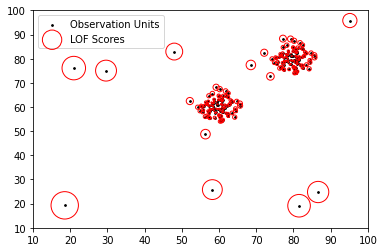

In [48]:
plt.scatter(X[:,0], X[:,1], color='k', s = 3, label='Observation Units')
plt.scatter(X[:,0], X[:,1], s = 750 * radius, edgecolors='r',
            facecolors='none', label = 'LOF Scores')
plt.xlim((10,100))
plt.ylim((10,100))

legend = plt.legend(loc = 'upper left')

In [49]:
np.sort(X_score)[0:9]

array([-15.3785652 , -11.57669644, -10.75276599, -10.24101046,
       -10.07364152,  -9.64406264,  -9.34229978,  -9.26256027,
        -9.06812573])

In [50]:
threshold = np.sort(X_score)[9]
threshold

-8.512759037993277

In [51]:
(X_score > threshold)[200:220]

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True])

In [52]:
TF_vector = (X_score > threshold)

In [53]:
X[(X_score < threshold)] #outliers

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [54]:
X[~TF_vector] # outlier observations

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

## Solving Outlier Observation Problem

In [55]:
df = X[X_score > threshold]
df[0:10]
# doing dataframe inliers way

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913],
       [84.73763845, 82.30230419],
       [78.59157684, 81.62768013],
       [78.60974692, 78.60281074],
       [80.72588681, 74.26015927],
       [74.8252465 , 78.31313741],
       [76.96150664, 80.942742  ],
       [77.27592777, 75.7630889 ]])

In [56]:
df_X = X.copy()

In [57]:
# filling as their means way
np.mean(df_X[0])
np.mean(df_X[1])

83.25607759176307

In [58]:
outliers = df_X[~TF_vector]

In [59]:
outliers

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [60]:
outliers[:, :1]

array([[114.71331664],
       [117.35061431],
       [ 58.19203955],
       [ 81.50221621],
       [ 18.50752874],
       [109.59906448],
       [ 29.61195895],
       [103.54925861],
       [ 86.63240472],
       [ 20.94339793]])

In [61]:
outliers[:, :1] = np.mean(df_X[0])
outliers

array([[ 80.53767478, 120.02266354],
       [ 80.53767478,  53.86944304],
       [ 80.53767478,  25.80792308],
       [ 80.53767478,  19.13336149],
       [ 80.53767478,  19.29504171],
       [ 80.53767478,  56.42192376],
       [ 80.53767478,  75.05797491],
       [ 80.53767478,  39.81941816],
       [ 80.53767478,  24.81495847],
       [ 80.53767478,  76.10578263]])

In [62]:
outliers[:, 1:2] = np.mean(df_X[1])
outliers

array([[80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759]])

In [63]:
df_X[~TF_vector] = outliers
df_X[~TF_vector]

array([[80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759]])

In [64]:
df_X = X.copy()
df_X[~TF_vector]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [65]:
# Changing Outliers with Suppression

In [66]:
df_X[X_score == threshold]

array([[58.19203955, 25.80792308]])

In [67]:
df_X[~TF_vector] = df_X[X_score == threshold]

In [68]:
df_X[~TF_vector]

array([[58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308]])

## Missing Data

### Fast Solution

In [69]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [70]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [71]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [72]:
df.V1.mean()

6.0

In [73]:
df['V1'].fillna(df.V1.mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [74]:
df['V1'].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [75]:
df.apply(lambda x: x.fillna(x.mean()), axis=0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


## Catching Missing Data

In [76]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [77]:
df.shape

(9, 3)

In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,7.0,6.000000,5.000000,1.0,2.0,6.0,8.00,15.0
V2,6.0,6.166667,3.656045,2.0,3.5,6.0,7.75,12.0
V3,7.0,11.000000,9.729680,2.0,5.5,7.0,13.00,31.0


In [79]:
df.dtypes

V1    float64
V2    float64
V3    float64
dtype: object

In [80]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [81]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [82]:
df.isnull().sum().sum()

7

In [83]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [84]:
df[df.isnull().any(axis=1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [85]:
df[df.notnull().all(axis=1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [86]:
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Visualizing to Missing Values and Randomness Examination

In [87]:
# !pip install missingno

In [88]:
import missingno as msno

In [89]:
df.head()

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0


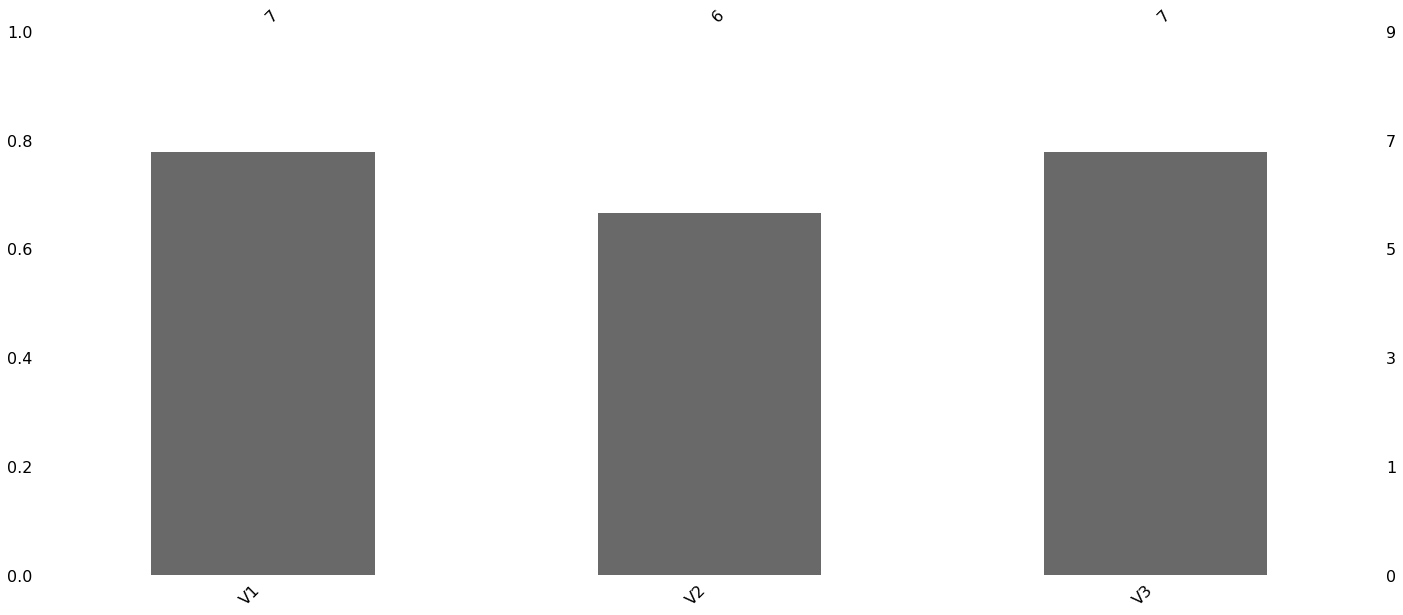

In [90]:
msno.bar(df);

In [91]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [92]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


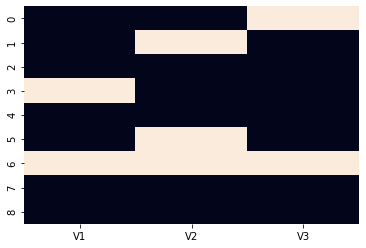

In [93]:
sns.heatmap(df.isnull(), cbar = False);

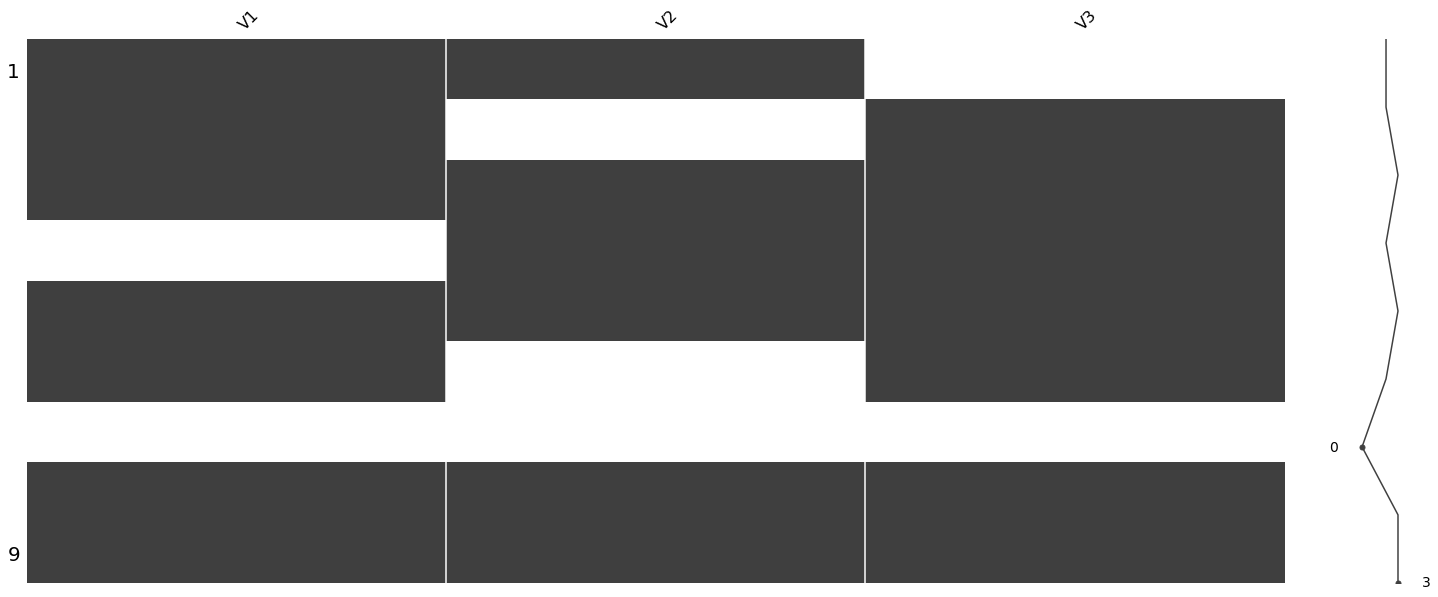

In [94]:
msno.matrix(df);

In [95]:
df = sns.load_dataset('planets').copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


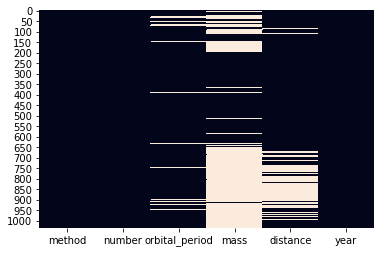

In [96]:
sns.heatmap(df.isnull(), cbar = False);

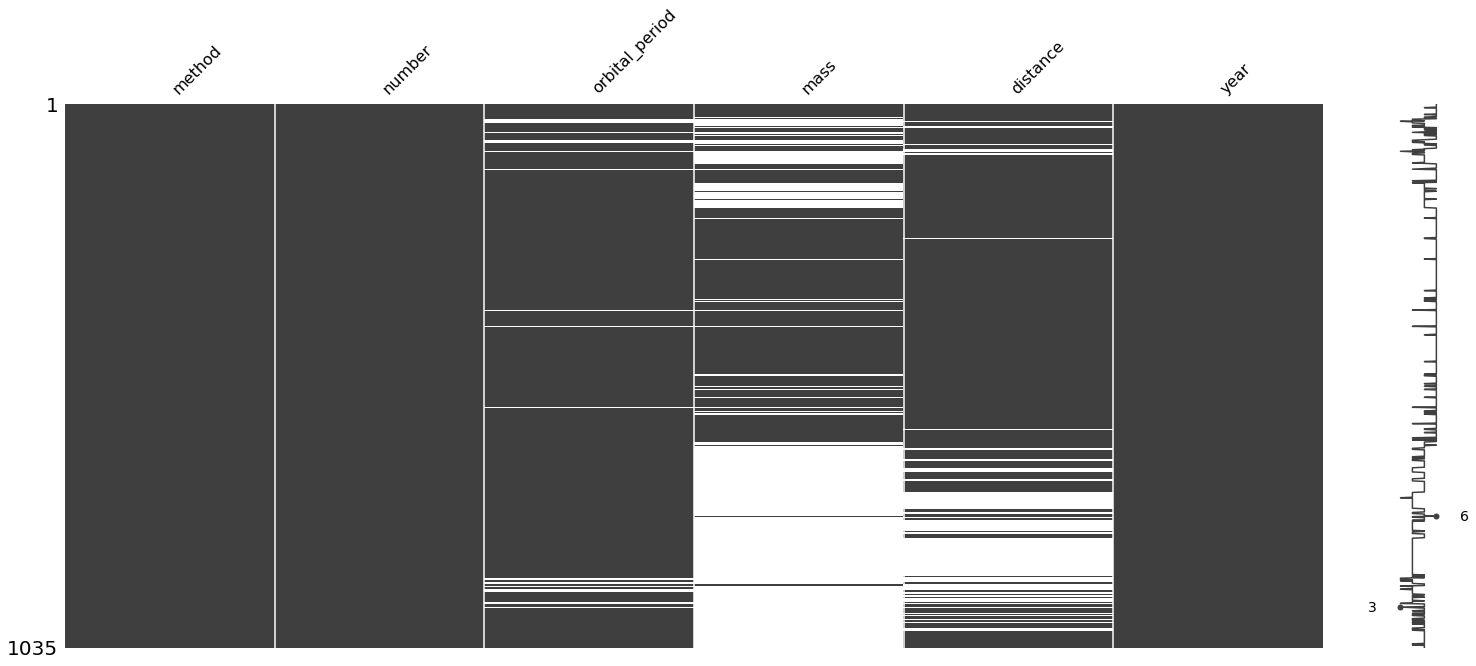

In [97]:
msno.matrix(df);

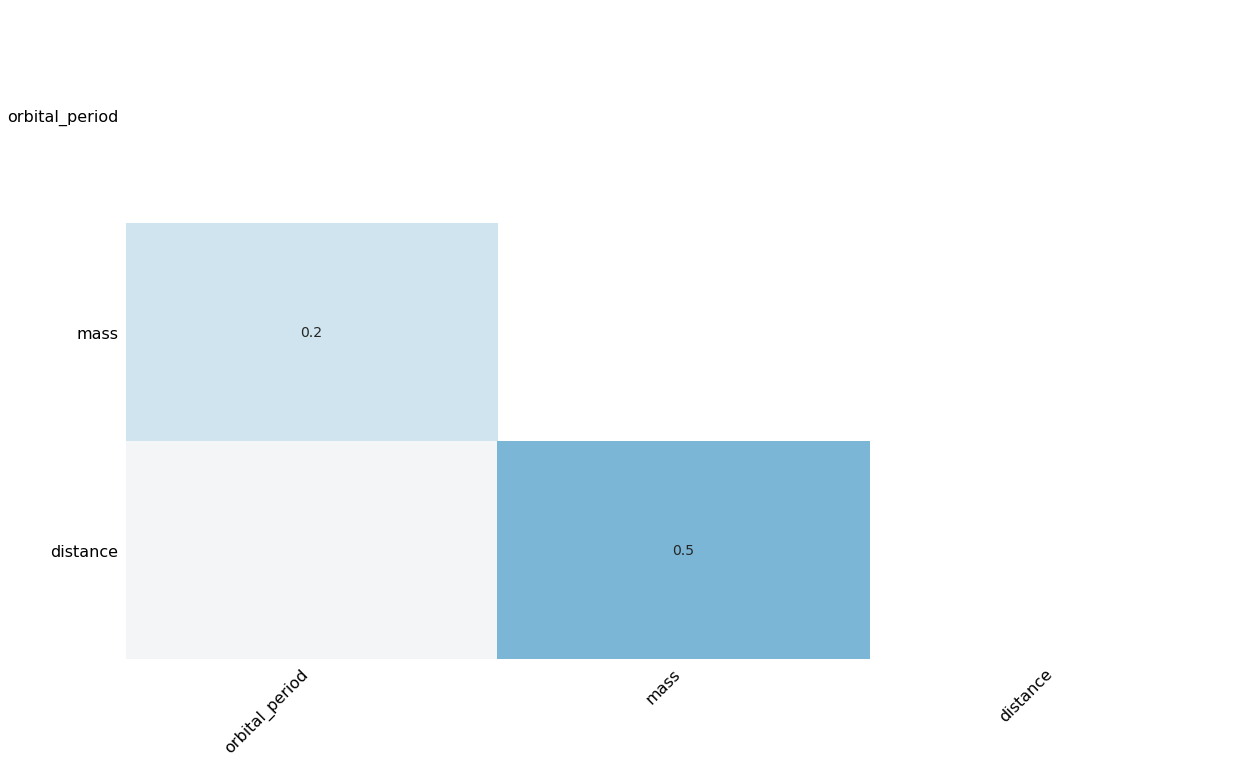

In [98]:
msno.heatmap(df, cbar=False);

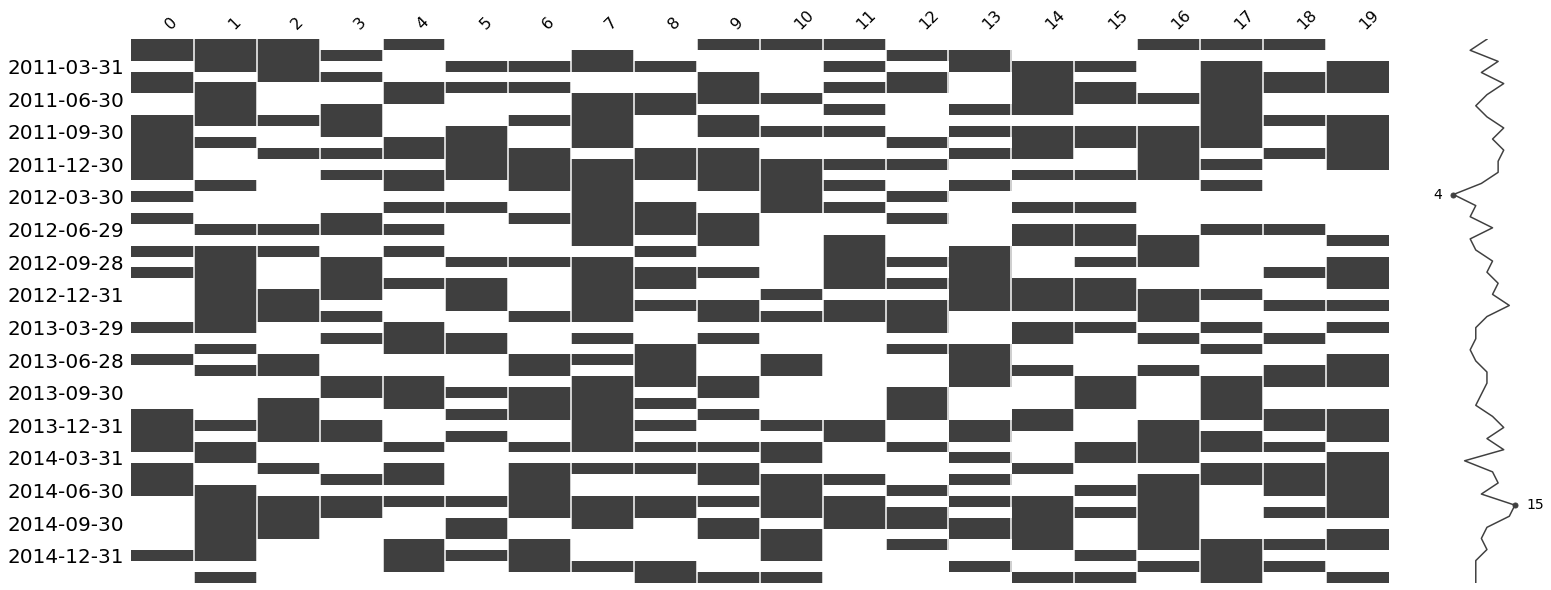

In [99]:
null_pattern = (np.random.random(1000).reshape((50, 20)) > 0.5).astype(bool)

null_pattern = pd.DataFrame(null_pattern).replace({False: None})

msno.matrix(null_pattern.set_index(pd.period_range('1/1/2011', '2/1/2015', freq='M')) , freq='BQ');

## Deleting Methods

In [100]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [101]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [102]:
df.dropna(how = 'all')

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [103]:
df['V1'][3,6] = 99

In [104]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,99.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,99.0,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [105]:
df.dropna(axis=1)

,V1
0,1.0
1,3.0
2,6.0
3,99.0
4,7.0
5,1.0
6,99.0
7,9.0
8,15.0


In [106]:
df.dropna(axis=1, how = 'all')

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,99.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,99.0,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [107]:
df['delete_me'] = np.nan

In [108]:
df.dropna(axis=1, how = 'all', inplace=True)

In [109]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,99.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,99.0,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Simple Filling Methods

In [110]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [111]:
df['V1'].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [112]:
df['V1'].fillna(df.V1.mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [113]:
df.apply(lambda x : x.fillna(x.mean()), axis = 0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [114]:
df.fillna(df.mean()[:]) # it is the same thing with lambda method

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [115]:
df.fillna(df.mean()['V1':'V2'])
df.fillna(df.median()['V3'])

,V1,V2,V3
0,1.0,7.0,7.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,7.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,7.0,7.0
6,7.0,7.0,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [116]:
df.where(pd.notna(df), df.mean(), axis = 'columns')

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [117]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [118]:
df.groupby('departman')['maas'].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [119]:
df['maas'].fillna(df.groupby('departman')['maas'].transform('mean'), inplace=True)

### Set Value at Categorical Variables

In [120]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT",np.NaN,"IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,nan
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [121]:
df.isnull()

,maas,V2,V3,departman
0,False,False,True,False
1,False,True,False,False
2,False,False,False,False
3,True,False,False,False
4,False,False,False,False
5,False,True,False,False
6,True,True,True,False
7,False,False,False,False
8,False,False,False,False


In [122]:
df.groupby('departman')['departman'].count()

departman
IK     5
IT     3
nan    1
Name: departman, dtype: int64

In [123]:
df.departman.loc[df.departman == 'nan'] = 'IK'
df

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IK
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [124]:
df.departman[0] = df.V3[0]
df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,maas,V2,V3,departman
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,IK
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [125]:
df.groupby('departman')['departman'].count()

departman
IK    6
IT    2
Name: departman, dtype: int64

In [126]:
df.departman.fillna(df['departman'].mode())

0    IK
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

### Setting Value at Time Series Process

In [127]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT",np.NaN,"IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,nan
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [128]:
df.maas.interpolate()

0     1.0
1     3.0
2     6.0
3     6.5
4     7.0
5     1.0
6     5.0
7     9.0
8    15.0
Name: maas, dtype: float64

In [129]:
df.maas.fillna(method = 'bfill')

0     1.0
1     3.0
2     6.0
3     7.0
4     7.0
5     1.0
6     9.0
7     9.0
8    15.0
Name: maas, dtype: float64

### Setting Value as Predictive Methods

number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64


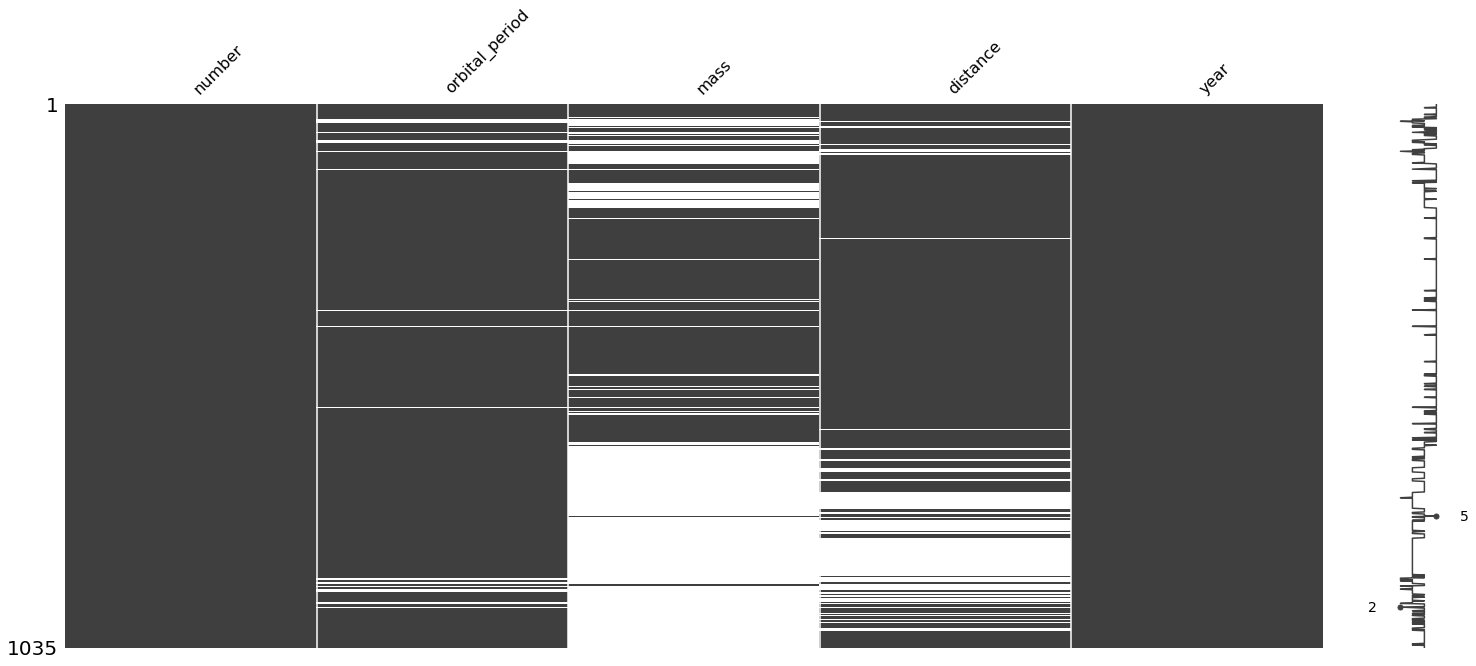

In [130]:
import seaborn as sns
df = sns.load_dataset('planets').copy()
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.isnull().sum())
msno.matrix(df);

In [131]:
#!pip install fancyimpute
from fancyimpute import KNN

Using TensorFlow backend.


In [132]:
var_names = list(df)
var_names

['number', 'orbital_period', 'mass', 'distance', 'year']

### KNN

In [133]:
knn_imp = KNN(k=5).fit_transform(df); # filled out nan values with KNN

Imputing row 1/1035 with 0 missing, elapsed time: 0.242
Imputing row 101/1035 with 1 missing, elapsed time: 0.245
Imputing row 201/1035 with 0 missing, elapsed time: 0.247
Imputing row 301/1035 with 0 missing, elapsed time: 0.248
Imputing row 401/1035 with 0 missing, elapsed time: 0.249
Imputing row 501/1035 with 0 missing, elapsed time: 0.250
Imputing row 601/1035 with 0 missing, elapsed time: 0.251
Imputing row 701/1035 with 2 missing, elapsed time: 0.255
Imputing row 801/1035 with 2 missing, elapsed time: 0.261
Imputing row 901/1035 with 2 missing, elapsed time: 0.267
Imputing row 1001/1035 with 1 missing, elapsed time: 0.274


In [134]:
knn_imp[0:2]

array([[1.00000e+00, 2.69300e+02, 7.10000e+00, 7.74000e+01, 2.00600e+03],
       [1.00000e+00, 8.74774e+02, 2.21000e+00, 5.69500e+01, 2.00800e+03]])

In [135]:
data = pd.DataFrame(knn_imp)
data.head()

,0,1,2,3,4
0,1.0,269.300,7.10,77.40,2006.0
1,1.0,874.774,2.21,56.95,2008.0
2,1.0,763.000,2.60,19.84,2011.0
3,1.0,326.030,19.40,110.62,2007.0
4,1.0,516.220,10.50,119.47,2009.0


In [136]:
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [137]:
data.columns = var_names

In [138]:
data.head()

,number,orbital_period,mass,distance,year
0,1.0,269.300,7.10,77.40,2006.0
1,1.0,874.774,2.21,56.95,2008.0
2,1.0,763.000,2.60,19.84,2011.0
3,1.0,326.030,19.40,110.62,2007.0
4,1.0,516.220,10.50,119.47,2009.0


In [139]:
# !pip install ycimpute
from ycimpute.imputer import knnimput

In [140]:
var_names = list(df)

In [141]:
n_df = np.array(df)

In [142]:
n_df.shape

(1035, 5)

In [143]:
data = knnimput.KNN(k =4).complete(n_df)

Imputing row 1/1035 with 0 missing, elapsed time: 0.269
Imputing row 101/1035 with 1 missing, elapsed time: 0.272
Imputing row 201/1035 with 0 missing, elapsed time: 0.275
Imputing row 301/1035 with 0 missing, elapsed time: 0.276
Imputing row 401/1035 with 0 missing, elapsed time: 0.277
Imputing row 501/1035 with 0 missing, elapsed time: 0.277
Imputing row 601/1035 with 0 missing, elapsed time: 0.278
Imputing row 701/1035 with 2 missing, elapsed time: 0.283
Imputing row 801/1035 with 2 missing, elapsed time: 0.288
Imputing row 901/1035 with 2 missing, elapsed time: 0.294
Imputing row 1001/1035 with 1 missing, elapsed time: 0.301


In [144]:
data = pd.DataFrame(data, columns=var_names)
data.head()

,number,orbital_period,mass,distance,year
0,1.0,269.300,7.10,77.40,2006.0
1,1.0,874.774,2.21,56.95,2008.0
2,1.0,763.000,2.60,19.84,2011.0
3,1.0,326.030,19.40,110.62,2007.0
4,1.0,516.220,10.50,119.47,2009.0


In [145]:
data.isnull().sum()

number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

### Setting with Random Forest

number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64


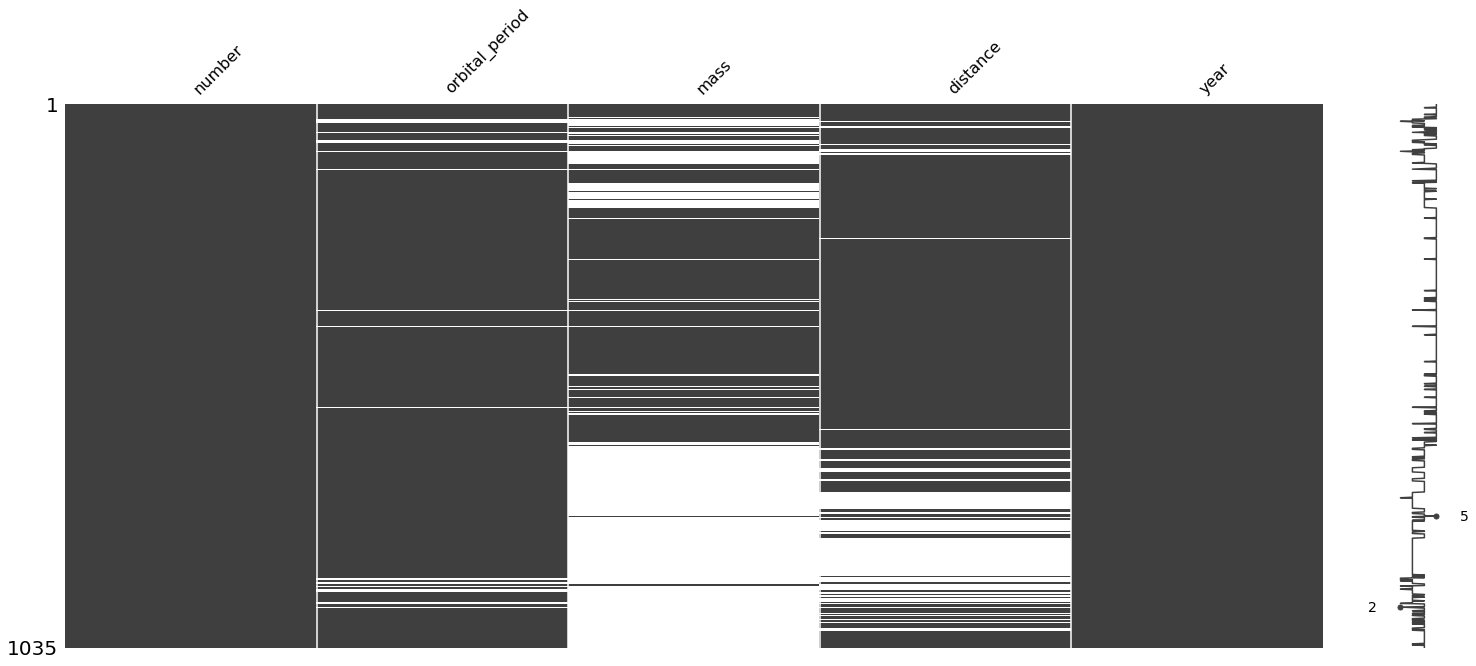

In [146]:
import seaborn as sns
df = sns.load_dataset('planets').copy()
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.isnull().sum())
msno.matrix(df);

In [147]:
from ycimpute.imputer import iterforest

In [148]:
var_names = list(df)

In [149]:
n_df = np.array(df)

In [150]:
data = iterforest.IterImput().complete(n_df)

In [151]:
data = pd.DataFrame(data, columns=var_names)
data.head()

,number,orbital_period,mass,distance,year
0,1.0,269.300,7.10,77.40,2006.0
1,1.0,874.774,2.21,56.95,2008.0
2,1.0,763.000,2.60,19.84,2011.0
3,1.0,326.030,19.40,110.62,2007.0
4,1.0,516.220,10.50,119.47,2009.0


In [152]:
data.isnull().sum()

number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

### Setting with EM

In [153]:
df.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [154]:
from ycimpute.imputer import EM

In [155]:
var_names = list(df)

In [156]:
n_df = np.array(df)

In [157]:
data = EM().complete(n_df)

In [158]:
data = pd.DataFrame(data, columns=var_names)
data.head()

,number,orbital_period,mass,distance,year
0,1.0,269.300,7.10,77.40,2006.0
1,1.0,874.774,2.21,56.95,2008.0
2,1.0,763.000,2.60,19.84,2011.0
3,1.0,326.030,19.40,110.62,2007.0
4,1.0,516.220,10.50,119.47,2009.0


In [159]:
data.isnull().sum()

number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

## Data Standardization & Variable Converting

### Standardization

In [161]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)



df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [162]:
from sklearn import preprocessing

In [163]:
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

### Normalization

In [165]:
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

### Min-Max Converting

In [166]:
scaler = preprocessing.MinMaxScaler(feature_range = (10,20))

In [167]:
scaler.fit_transform(df)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

### Binarize Converting

In [169]:
binarizer = preprocessing.Binarizer(threshold = 5).fit(df)
binarizer.transform(df)

array([[0., 1., 1.],
       [0., 1., 1.],
       [1., 0., 0.],
       [0., 1., 1.],
       [1., 1., 1.]])

### 0-1 Converting

In [172]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df_l = df.copy()

In [173]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [174]:
df_l['new_sex'] = df_l['sex'].cat.codes
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,new_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1


In [175]:
le = preprocessing.LabelEncoder()

In [176]:
df_l['le_new_sex'] = le.fit_transform(df_l['sex'])

In [177]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,new_sex,le_new_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


### "1 and Others (0)" Converting

In [178]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [179]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,new_sex,le_new_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


In [180]:
df_l['new_day'] = np.where(df_l['day'].str.contains('Sun'),1,0)

In [187]:
df_l[15:25]

,total_bill,tip,sex,smoker,day,time,size,new_sex,le_new_sex,new_day
15,21.58,3.92,Male,No,Sun,Dinner,2,0,1,1
16,10.33,1.67,Female,No,Sun,Dinner,3,1,0,1
17,16.29,3.71,Male,No,Sun,Dinner,3,0,1,1
18,16.97,3.50,Female,No,Sun,Dinner,3,1,0,1
19,20.65,3.35,Male,No,Sat,Dinner,3,0,1,0
20,17.92,4.08,Male,No,Sat,Dinner,2,0,1,0
21,20.29,2.75,Female,No,Sat,Dinner,2,1,0,0
22,15.77,2.23,Female,No,Sat,Dinner,2,1,0,0
23,39.42,7.58,Male,No,Sat,Dinner,4,0,1,0
24,19.82,3.18,Male,No,Sat,Dinner,2,0,1,0


### Multi-class Converting

In [188]:
le = preprocessing.LabelEncoder()

In [192]:
df_l['more_new_day'] = le.fit_transform(df_l['day'])

In [195]:
df_l[15:25]

,total_bill,tip,sex,smoker,day,time,size,new_sex,le_new_sex,new_day,more_new_day
15,21.58,3.92,Male,No,Sun,Dinner,2,0,1,1,2
16,10.33,1.67,Female,No,Sun,Dinner,3,1,0,1,2
17,16.29,3.71,Male,No,Sun,Dinner,3,0,1,1,2
18,16.97,3.50,Female,No,Sun,Dinner,3,1,0,1,2
19,20.65,3.35,Male,No,Sat,Dinner,3,0,1,0,1
20,17.92,4.08,Male,No,Sat,Dinner,2,0,1,0,1
21,20.29,2.75,Female,No,Sat,Dinner,2,1,0,0,1
22,15.77,2.23,Female,No,Sat,Dinner,2,1,0,0,1
23,39.42,7.58,Male,No,Sat,Dinner,4,0,1,0,1
24,19.82,3.18,Male,No,Sat,Dinner,2,0,1,0,1


### One-Hot Converting and Dummy Variable Trap

In [196]:
df_one_hot = df.copy()

In [197]:
pd.get_dummies(df_one_hot, columns = ["sex"], prefix = ["sex"]).head()

,total_bill,tip,smoker,day,time,size,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1


In [198]:
pd.get_dummies(df_one_hot, columns = ["day"], prefix = ["day"]).head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,0,0,1


### Converting Continuously Variable to Categorical Variable

In [199]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [200]:
data = df.select_dtypes(include = ["float64", "int64"])

In [201]:
data.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [202]:
est = preprocessing.KBinsDiscretizer(n_bins = [3,2,2], encode = "ordinal", strategy = "quantile").fit(data)

In [204]:
est.transform(data)[0:10]

array([[1., 0., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [1., 0., 1.],
       [0., 1., 1.]])

### Convert Variable to Index, Convert Index to Variable

In [205]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [206]:
df['new_variable'] = df.index
df.head()

,total_bill,tip,sex,smoker,day,time,size,new_variable
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,2
3,23.68,3.31,Male,No,Sun,Dinner,2,3
4,24.59,3.61,Female,No,Sun,Dinner,4,4


In [207]:
df.index = df['new_variable'] + 10

In [208]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,new_variable
new_variable,,,,,,,,
10,16.99,1.01,Female,No,Sun,Dinner,2,0
11,10.34,1.66,Male,No,Sun,Dinner,3,1
12,21.01,3.50,Male,No,Sun,Dinner,3,2
13,23.68,3.31,Male,No,Sun,Dinner,2,3
14,24.59,3.61,Female,No,Sun,Dinner,4,4


In [209]:
df.index

Int64Index([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
            ...
            244, 245, 246, 247, 248, 249, 250, 251, 252, 253],
           dtype='int64', name='new_variable', length=244)